In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
temp_country = pd.read_csv('../data/cleaned/global_temperatures_by_country_1900_2012_cleaned.csv')
#temp_country['country'].unique()

In [3]:
country_top10_temp = ['United States','China','Russia','Japan','India','United Kingdom','Canada','France','Germany','Italy','Timor Leste']

In [4]:
temp_country_top10 = temp_country[temp_country['country'].isin(country_top10_temp)]
temp_country_top10.tail()

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
307735,557807,2012-08-01,21.422,0.251,United States
307736,557808,2012-09-01,17.036,0.185,United States
307737,557809,2012-10-01,9.688,0.225,United States
307738,557810,2012-11-01,3.330,0.120,United States
307739,557811,2012-12-01,-1.261,0.228,United States


In [5]:
temp_country_top10['date']=pd.to_datetime(temp_country_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_32028\2076103652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_country_top10['date']=pd.to_datetime(temp_country_top10['date'])


In [6]:
temp_country_top10['year']= temp_country_top10['date'].dt.year
temp_country_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_32028\2743915740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_country_top10['year']= temp_country_top10['date'].dt.year


,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country,year
54240,98831,1900-01-01,-23.610,0.874,Canada,1900
54241,98832,1900-02-01,-22.475,1.083,Canada,1900
54242,98833,1900-03-01,-16.527,0.821,Canada,1900
54243,98834,1900-04-01,-4.487,1.029,Canada,1900
54244,98835,1900-05-01,3.231,0.865,Canada,1900
...,...,...,...,...,...,...
307735,557807,2012-08-01,21.422,0.251,United States,2012
307736,557808,2012-09-01,17.036,0.185,United States,2012
307737,557809,2012-10-01,9.688,0.225,United States,2012
307738,557810,2012-11-01,3.330,0.120,United States,2012


In [7]:
temp_country_top10_pivot = pd.pivot_table(temp_country_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
temp_country_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_32028\500322281.py:1: FutureWarning: The provided callable <function mean at 0x000001D0C8CB2FC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_country_top10_pivot = pd.pivot_table(temp_country_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


,country,year,average_temperature
0,Canada,1900,-5.018750
1,Canada,1901,-5.052250
2,Canada,1902,-5.170917
3,Canada,1903,-5.302583
4,Canada,1904,-5.905083
...,...,...,...
1238,United States,2008,8.951417
1239,United States,2009,9.137083
1240,United States,2010,9.505583
1241,United States,2011,9.549917


In [8]:
temp_country_top10 = pd.pivot(temp_country_top10_pivot, index='country', columns='year', values='average_temperature').reset_index()


In [9]:
list_of_col = temp_country_top10.columns
for x in list_of_col:
    if (x != 'country') & (x != 1900):        
        temp_country_top10[f"diff{x}"] = temp_country_top10[x] - temp_country_top10[x-1]
    else:
        pass

C:\Users\schue\AppData\Local\Temp\ipykernel_32028\3135443136.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_country_top10[f"diff{x}"] = temp_country_top10[x] - temp_country_top10[x-1]
C:\Users\schue\AppData\Local\Temp\ipykernel_32028\3135443136.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_country_top10[f"diff{x}"] = temp_country_top10[x] - temp_country_top10[x-1]
C:\Users\schue\AppData\Local\Temp\ipykernel_32028\3135443136.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [10]:
temp_country_top10

year,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,diff2003,diff2004,diff2005,diff2006,diff2007,diff2008,diff2009,diff2010,diff2011,diff2012
0,Canada,-5.018750,-5.052250,-5.170917,-5.302583,-5.905083,-5.106417,-5.049417,-6.563083,-5.241417,...,0.503333,-1.063583,1.614333,0.848583,-1.600750,-0.234333,0.160167,2.247167,-1.669167,0.380250
1,China,6.444167,6.537500,6.744667,6.174583,6.350833,5.755500,6.221833,6.308667,6.286583,...,-0.273667,0.190750,-0.299250,0.534500,0.178750,-0.560667,0.243417,-0.261083,-0.191333,-0.280000
2,France,12.987333,12.328417,12.391917,12.592333,12.813250,12.419667,12.714500,12.508250,12.448417,...,0.289750,-0.673833,0.030167,0.449583,-0.247250,-0.315083,0.360167,-0.826250,1.364167,-0.772417
3,Germany,8.452083,7.681083,7.256667,8.402417,8.400333,8.027417,8.354000,7.852583,7.521333,...,-0.143083,-0.440833,0.075000,0.577583,0.291500,-0.355333,-0.283000,-1.350167,1.810583,-0.592417
4,India,24.367833,24.084250,24.318667,23.767417,23.758500,23.515000,23.888083,23.677083,23.741917,...,-0.263083,-0.015333,-0.139167,0.236667,-0.082167,-0.243917,0.740667,-0.095833,-0.635250,0.225250
5,Italy,12.998000,12.205583,12.516750,12.473750,12.932167,12.243083,12.330167,12.420833,12.338500,...,0.362917,-0.737083,-0.531250,0.758750,0.286000,-0.192083,0.171667,-0.728000,0.848250,-0.094167
6,Japan,11.473667,11.680167,11.523750,11.843333,11.770167,11.597417,11.183917,11.403167,11.096000,...,-0.330333,0.928667,-0.879750,0.201167,0.435083,-0.317250,0.058917,0.281750,-0.477833,-0.172083
7,Russia,-5.874333,-5.460083,-7.002750,-5.352583,-5.418500,-5.687083,-5.101750,-6.041417,-6.122583,...,0.290083,-0.660750,0.995500,-1.264917,1.787917,-0.330333,-1.303083,0.087917,1.119000,-0.500167
8,Timor Leste,26.282000,25.691667,25.544500,25.666500,25.148667,26.106500,26.462583,25.448667,25.520417,...,-0.012250,-0.136333,0.391167,-0.657417,0.275167,-0.171000,0.335667,0.149667,-0.771917,0.185750
9,United Kingdom,8.550417,8.379167,8.001500,8.329333,8.263833,8.390417,8.510833,8.093250,8.576417,...,0.062417,-0.004750,-0.082083,0.288167,-0.145917,-0.449250,0.105083,-1.059000,1.513583,-0.870500


In [11]:
temp_country_top10_diff = temp_country_top10.drop(columns=list_of_col[1:], axis=1)

In [12]:
modified_list_of_col = pd.Index([x for x in list_of_col if x != 1980])
temp_country_top10_diff.columns = modified_list_of_col
temp_country_top10_diff

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Canada,-0.033500,-0.118667,-0.131667,-0.602500,0.798667,0.057000,-1.513667,1.321667,-0.666417,...,0.503333,-1.063583,1.614333,0.848583,-1.600750,-0.234333,0.160167,2.247167,-1.669167,0.380250
1,China,0.093333,0.207167,-0.570083,0.176250,-0.595333,0.466333,0.086833,-0.022083,0.094667,...,-0.273667,0.190750,-0.299250,0.534500,0.178750,-0.560667,0.243417,-0.261083,-0.191333,-0.280000
2,France,-0.658917,0.063500,0.200417,0.220917,-0.393583,0.294833,-0.206250,-0.059833,-0.341167,...,0.289750,-0.673833,0.030167,0.449583,-0.247250,-0.315083,0.360167,-0.826250,1.364167,-0.772417
3,Germany,-0.771000,-0.424417,1.145750,-0.002083,-0.372917,0.326583,-0.501417,-0.331250,-0.184500,...,-0.143083,-0.440833,0.075000,0.577583,0.291500,-0.355333,-0.283000,-1.350167,1.810583,-0.592417
4,India,-0.283583,0.234417,-0.551250,-0.008917,-0.243500,0.373083,-0.211000,0.064833,-0.080917,...,-0.263083,-0.015333,-0.139167,0.236667,-0.082167,-0.243917,0.740667,-0.095833,-0.635250,0.225250
5,Italy,-0.792417,0.311167,-0.043000,0.458417,-0.689083,0.087083,0.090667,-0.082333,-0.192500,...,0.362917,-0.737083,-0.531250,0.758750,0.286000,-0.192083,0.171667,-0.728000,0.848250,-0.094167
6,Japan,0.206500,-0.156417,0.319583,-0.073167,-0.172750,-0.413500,0.219250,-0.307167,0.292750,...,-0.330333,0.928667,-0.879750,0.201167,0.435083,-0.317250,0.058917,0.281750,-0.477833,-0.172083
7,Russia,0.414250,-1.542667,1.650167,-0.065917,-0.268583,0.585333,-0.939667,-0.081167,0.257500,...,0.290083,-0.660750,0.995500,-1.264917,1.787917,-0.330333,-1.303083,0.087917,1.119000,-0.500167
8,Timor Leste,-0.590333,-0.147167,0.122000,-0.517833,0.957833,0.356083,-1.013917,0.071750,0.193083,...,-0.012250,-0.136333,0.391167,-0.657417,0.275167,-0.171000,0.335667,0.149667,-0.771917,0.185750
9,United Kingdom,-0.171250,-0.377667,0.327833,-0.065500,0.126583,0.120417,-0.417583,0.483167,-0.681167,...,0.062417,-0.004750,-0.082083,0.288167,-0.145917,-0.449250,0.105083,-1.059000,1.513583,-0.870500


In [13]:
temp_country_top10_diff_long = pd.melt(temp_country_top10_diff, id_vars='country', value_vars=temp_country_top10_diff.columns[1:], value_name='average_temperature')
temp_country_top10_diff_long

,country,variable,average_temperature
0,Canada,1900,-0.033500
1,China,1900,0.093333
2,France,1900,-0.658917
3,Germany,1900,-0.771000
4,India,1900,-0.283583
...,...,...,...
1227,Japan,2012,-0.172083
1228,Russia,2012,-0.500167
1229,Timor Leste,2012,0.185750
1230,United Kingdom,2012,-0.870500


In [14]:
temp_country_top10_diff_long.rename(columns={'variable':'year'}, inplace=True)
temp_country_top10_diff_long.sort_values(by=['country','year'], axis=0, ascending=True, inplace=True)
temp_country_top10_diff_long.reset_index(drop=True, inplace=True)
temp_country_top10_diff_long

,country,year,average_temperature
0,Canada,1900,-0.033500
1,Canada,1901,-0.118667
2,Canada,1902,-0.131667
3,Canada,1903,-0.602500
4,Canada,1904,0.798667
...,...,...,...
1227,United States,2008,-0.886083
1228,United States,2009,0.185667
1229,United States,2010,0.368500
1230,United States,2011,0.044333


<Axes: xlabel='year', ylabel='average_temperature'>

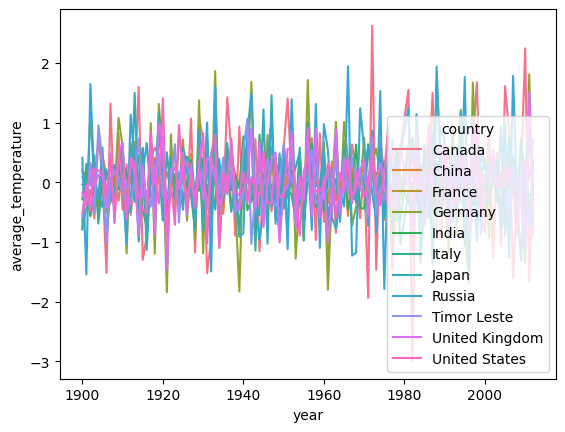

In [15]:
sns.lineplot(data=temp_country_top10_diff_long, x='year', y='average_temperature', hue='country')

<Axes: xlabel='year', ylabel='average_temperature'>

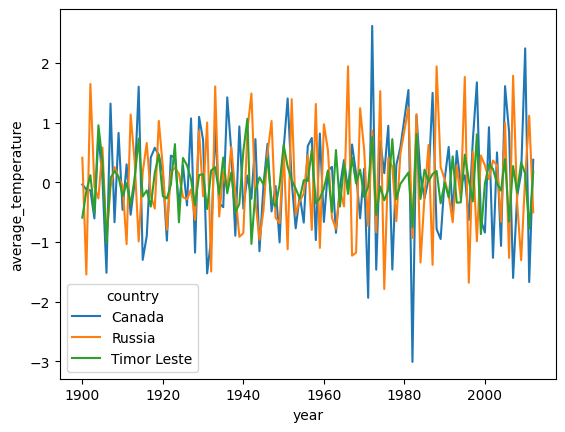

In [16]:
sns.lineplot(data=temp_country_top10_diff_long[temp_country_top10_diff_long['country'].isin(['Canada','Russia','Timor Leste'])], x='year', y='average_temperature', hue='country')

In [17]:
temp_country_top10_diff_long.to_csv('../data/cleaned/annual_increase_of_temp_by_country.csv', index=False)

In [18]:
temp_country_top10_diff_long

,country,year,average_temperature
0,Canada,1900,-0.033500
1,Canada,1901,-0.118667
2,Canada,1902,-0.131667
3,Canada,1903,-0.602500
4,Canada,1904,0.798667
...,...,...,...
1227,United States,2008,-0.886083
1228,United States,2009,0.185667
1229,United States,2010,0.368500
1230,United States,2011,0.044333
